# Préparation des données

données population https://github.com/datasets/population/blob/master/data/population.csv

scrap IHD : https://github.com/iyadaqel/Human-Development-Index-dataset

## Import

In [1]:
import pandas as pd

df = pd.read_csv("final.csv")

In [2]:
df.sample(10)

,Date,Country/Region,conf_Value,death_Value,reco_Value
44632,2020-07-08,Morocco,14771,242,11316
50677,2020-10-06,Peru,829999,32834,712888
50404,2021-02-07,Paraguay,138118,2826,114258
36274,2020-06-17,Lesotho,4,0,2
29571,2020-08-02,Indonesia,111455,5236,68975
47805,2020-07-05,Nigeria,28711,645,11665
31504,2020-06-11,Italy,236142,34167,171338
25823,2020-02-09,Guatemala,0,0,0
20395,2020-06-18,Equatorial Guinea,1664,32,515
16130,2020-09-28,Croatia,16245,272,14793


In [3]:
df.describe()

,conf_Value,death_Value,reco_Value
count,7.146000e+04,7.146000e+04,7.146000e+04
mean,3.571548e+05,9.384208e+03,2.121406e+05
std,3.637713e+06,8.495435e+04,2.118475e+06
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.127500e+02,1.000000e+00,2.200000e+01
50%,3.672000e+03,6.700000e+01,1.737000e+03
75%,5.404300e+04,9.510000e+02,2.726500e+04
max,1.109063e+08,2.457828e+06,6.242207e+07


## Calcul des nouveaux cas par jour

In [4]:
g = df.groupby("Country/Region")[["conf_Value","death_Value","reco_Value"]].apply(lambda x : x.diff())
df[["new_conf","new_death","new_reco"]] = g.reset_index(0, drop=True)

In [5]:
df.head(10)

,Date,Country/Region,conf_Value,death_Value,reco_Value,new_conf,new_death,new_reco
0,2020-01-22,World,555,17,30,NaN,NaN,NaN
1,2020-01-23,World,653,18,32,98.0,1.0,2.0
2,2020-01-24,World,936,26,39,283.0,8.0,7.0
3,2020-01-25,World,1428,42,42,492.0,16.0,3.0
4,2020-01-26,World,2111,56,56,683.0,14.0,14.0
5,2020-01-27,World,2918,82,65,807.0,26.0,9.0
6,2020-01-28,World,5566,131,108,2648.0,49.0,43.0
7,2020-01-29,World,6155,133,127,589.0,2.0,19.0
8,2020-01-30,World,8222,171,145,2067.0,38.0,18.0
9,2020-01-31,World,9906,213,225,1684.0,42.0,80.0


In [6]:
df.rolling(7).mean().head(10)

,conf_Value,death_Value,reco_Value,new_conf,new_death,new_reco
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN
6,2023.857143,53.142857,53.142857,NaN,NaN,NaN
7,2823.857143,69.714286,67.000000,800.000000,16.571429,13.857143
8,3905.142857,91.571429,83.142857,1081.285714,21.857143,16.142857
9,5186.571429,118.285714,109.714286,1281.428571,26.714286,26.571429


## Cacluls sur une fenêtre glissante

In [7]:
g = df.groupby("Country/Region")[["new_conf","new_death","new_reco"]].apply(lambda x : x.rolling(7).mean())
df[["new_conf_rol","new_death_rol","new_reco_rol"]] = g.reset_index(0, drop=True)

In [8]:
df.head(10)

,Date,Country/Region,conf_Value,death_Value,reco_Value,new_conf,new_death,new_reco,new_conf_rol,new_death_rol,new_reco_rol
0,2020-01-22,World,555,17,30,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-23,World,653,18,32,98.0,1.0,2.0,NaN,NaN,NaN
2,2020-01-24,World,936,26,39,283.0,8.0,7.0,NaN,NaN,NaN
3,2020-01-25,World,1428,42,42,492.0,16.0,3.0,NaN,NaN,NaN
4,2020-01-26,World,2111,56,56,683.0,14.0,14.0,NaN,NaN,NaN
5,2020-01-27,World,2918,82,65,807.0,26.0,9.0,NaN,NaN,NaN
6,2020-01-28,World,5566,131,108,2648.0,49.0,43.0,NaN,NaN,NaN
7,2020-01-29,World,6155,133,127,589.0,2.0,19.0,800.000000,16.571429,13.857143
8,2020-01-30,World,8222,171,145,2067.0,38.0,18.0,1081.285714,21.857143,16.142857
9,2020-01-31,World,9906,213,225,1684.0,42.0,80.0,1281.428571,26.714286,26.571429


## Dates

In [9]:
date_format = "%Y-%m-%d"
df['Date'] = pd.to_datetime(df['Date'], format=date_format)
df.set_index("Date", inplace=True)

In [10]:
df.head()

,Country/Region,conf_Value,death_Value,reco_Value,new_conf,new_death,new_reco,new_conf_rol,new_death_rol,new_reco_rol
Date,,,,,,,,,,
2020-01-22,World,555,17,30,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-23,World,653,18,32,98.0,1.0,2.0,NaN,NaN,NaN
2020-01-24,World,936,26,39,283.0,8.0,7.0,NaN,NaN,NaN
2020-01-25,World,1428,42,42,492.0,16.0,3.0,NaN,NaN,NaN
2020-01-26,World,2111,56,56,683.0,14.0,14.0,NaN,NaN,NaN


# Calcul d'indicateurs

Pour le monde et pour la France (bonus : pour un pays sélectionné par
son nom / son identifiant) et pour un jour donné, indiquer les valeurs
de cas confirmés, décès, guérisons :
- pour le jour lui-même
- pour la semaine
- cumul depuis le début du jeu de données

Lorsque les données concernent un pays, (essayer d')indiquer les
valeurs des indices de mobilité et de mesures restrictives.

In [11]:
from datetime import date

today = date.today().strftime(date_format)
today

'2021-03-11'

In [12]:
# region = "World"
region = "France"
start_day = "2020-06-01"
end_day = "2020-06-14"
#end_day = "2020-12-30"
# day = today

window = 28 # taille de la fenêtre en jour

## jour même

In [13]:
df[df["Country/Region"] == region].loc[start_day]

Country/Region       France
conf_Value           191382
death_Value           28837
reco_Value            68558
new_conf              407.0
new_death              32.0
new_reco               85.0
new_conf_rol          971.0
new_death_rol     53.714286
new_reco_rol          463.0
Name: 2020-06-01 00:00:00, dtype: object

## semaine

In [14]:
from datetime import timedelta, datetime

def compute_start_date(day, window) :
    d_start = datetime.strptime(day, date_format) - timedelta(days=window)
    return d_start.strftime(date_format)

In [15]:
df[df["Country/Region"] == region].loc[compute_start_date(start_day, window):start_day].head()

,Country/Region,conf_Value,death_Value,reco_Value,new_conf,new_death,new_reco,new_conf_rol,new_death_rol,new_reco_rol
Date,,,,,,,,,,
2020-05-04,France,171102,25204,51476,562.0,306.0,591.0,733.714286,276.714286,851.857143
2020-05-05,France,172219,25537,52842,1117.0,333.0,1366.0,445.857143,271.857143,850.857143
2020-05-06,France,176355,25812,54079,4136.0,275.0,1237.0,1244.571429,250.285714,835.857143
2020-05-07,France,177096,25991,55191,741.0,179.0,1112.0,1176.428571,234.571429,816.428571
2020-05-08,France,177627,26233,55892,531.0,242.0,701.0,1177.142857,238.142857,811.428571


## depuis le debut

In [16]:
col_cum = ["conf_Value", "death_Value", "reco_Value"]
col_new = ["new_death", "new_reco"]
# col_new_rol = ["new_conf_rol", "new_death_rol", "new_reco_rol"]
col_new_rol = ["new_death_rol", "new_reco_rol"]

# col = ["death_Value"]

In [17]:
df[df["Country/Region"] == region][col_cum].iloc[-1]

conf_Value     3597540
death_Value      83546
reco_Value      253337
Name: 2021-02-21 00:00:00, dtype: int64

# Visualisation

Pour le monde et pour la France (bonus : pour un pays sélectionné par
son nom / son identifiant)

In [18]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [14, 8]

## evolution sur toute la période

<AxesSubplot:xlabel='Date'>

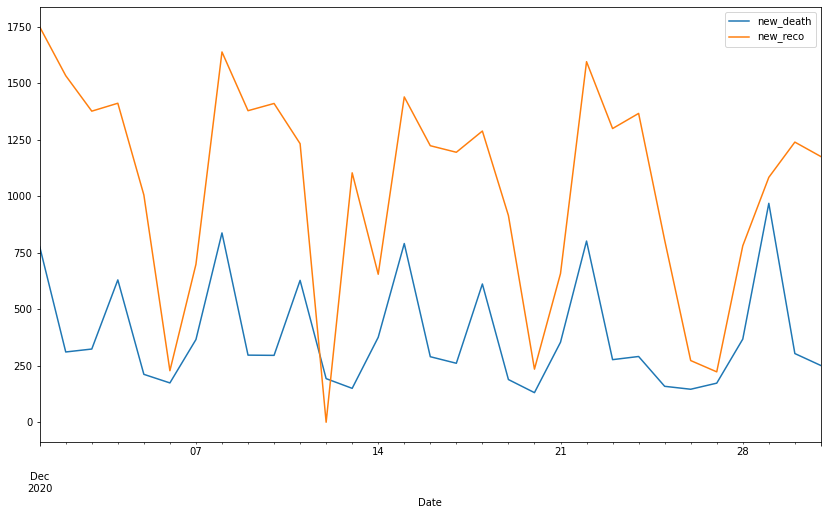

In [19]:
df[df["Country/Region"] == region][col_new].loc['2020-12'].plot()

<AxesSubplot:xlabel='Date'>

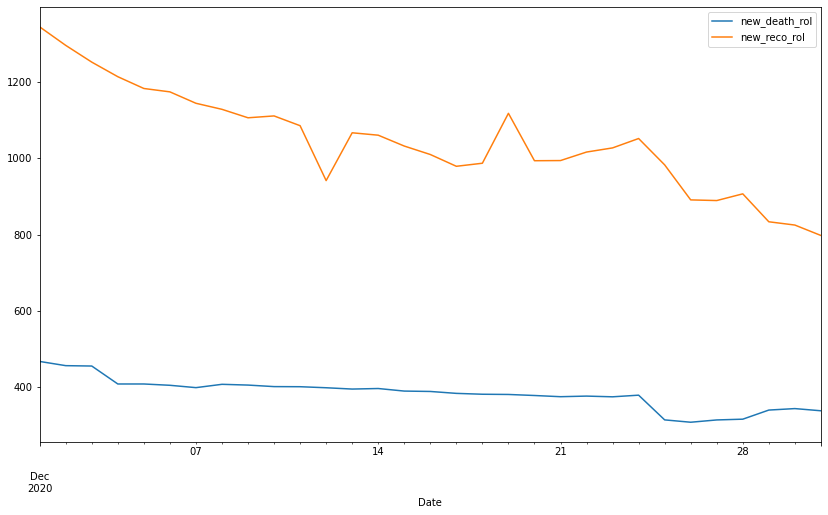

In [20]:
df[df["Country/Region"] == region][col_new_rol].loc['2020-12'].plot()

## une region séléctionnée pour une fenêtre de n jours

https://stackoverflow.com/questions/36757301/disable-ipython-notebook-autoscrolling

In [21]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [22]:
df[df["Country/Region"].isin(['France', 'World'])].loc[start_day:end_day]

,Country/Region,conf_Value,death_Value,reco_Value,new_conf,new_death,new_reco,new_conf_rol,new_death_rol,new_reco_rol
Date,,,,,,,,,,
2020-06-01,World,6261160,377789,2676055,95591.0,3062.0,54837.0,110502.285714,4051.571429,66229.285714
2020-06-02,World,6382785,382456,2780010,121625.0,4667.0,103955.0,114485.714286,4112.714286,73212.714286
2020-06-03,World,6496610,387875,2859015,113825.0,5419.0,79005.0,116127.000000,4164.428571,75470.142857
2020-06-04,World,6627068,392891,2928999,130458.0,5016.0,69984.0,117768.285714,4227.857143,75927.857143
2020-06-05,World,6757709,397455,2998067,130641.0,4564.0,69068.0,119215.142857,4221.000000,74775.142857
2020-06-06,World,6890953,401265,3070006,133244.0,3810.0,71939.0,118785.714286,4190.428571,74999.571429
2020-06-07,World,7002817,403996,3125025,111864.0,2731.0,55019.0,119606.857143,4181.285714,71972.428571
2020-06-08,World,7104896,407688,3276521,102079.0,3692.0,151496.0,120533.714286,4271.285714,85780.857143
2020-06-09,World,7229448,412459,3358567,124552.0,4771.0,82046.0,120951.857143,4286.142857,82651.000000


In [42]:
df["Country/Region"] = df["Country/Region"].astype("category")

In [60]:
df["D"]

Date
2020-01-22    1
2020-01-23    1
2020-01-24    1
2020-01-25    1
2020-01-26    1
             ..
2021-02-17    1
2021-02-18    1
2021-02-19    1
2021-02-20    1
2021-02-21    1
Name: D, Length: 71460, dtype: int64

In [58]:
df["D"][df["Country/Region"] == "France"] = 0

<ipython-input-58-1abc8e2a8a23>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["D"][df["Country/Region"] == "France"] = 0


In [59]:
import seaborn as sns
sns.relplot(data = df[df["Country/Region"].isin(['France', 'World'])].loc[start_day:end_day],  
            kind='line', col = "D")

ValueError: The following variable cannot be assigned with wide-form data: `col`

In [24]:
def plot_region(region, start_day='2020-06-01', end_day='2020-10-30', col = col_cum) :
    col = list(col)
    a = df[df["Country/Region"] == region][col].loc[start_day:end_day].plot()
    a.set_xlabel('x-axis', color = 'r') 

In [25]:
values = df["Country/Region"].unique()

- https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html
- https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html#

In [29]:
import ipywidgets as widgets

In [30]:
col_selector = widgets.SelectMultiple(
    options=col_cum + col_new + col_new_rol,
    value=col_cum,
    #rows=10,
)

In [31]:
widgets.interactive(plot_region, region = values, col = col_selector)

interactive(children=(Dropdown(description='region', options=('World', 'Afghanistan', 'Albania', 'Algeria', 'A…

In [28]:
from IPython.display import display, HTML
display(HTML("<script>$('div.cell.selected').next().height(100);</script>"))


## bqplot

In [33]:
#df[df["Country/Region"] == region].loc[compute_start_date(day, window):day].plot(kind="bar", stacked= True)

In [34]:
from bqplot import pyplot as plt
import bqplot

fig = plt.figure( title='Line Chart')
p = plt.plot(x = df[df["Country/Region"] == region].index, y = df[df["Country/Region"] == region].death_Value)

In [35]:
fig

Figure(axes=[Axis(scale=DateScale(), side='bottom'), Axis(orientation='vertical', scale=LinearScale(), side='l…

In [36]:
fig.layout.width = 'auto'
fig.layout.height = 'auto'
fig.layout.min_height = '300px' # so it shows nicely in the notebook
fig.layout.flex = '1'

In [37]:
brushintsel = bqplot.interacts.BrushIntervalSelector(scale=p.scales['x'])

In [38]:
label_selected = widgets.Label(value="Selected: 0")
label_selected

Label(value='Selected: 0')

In [39]:
def update_range(*args):
    label_selected.value = "Selected range {}".format(brushintsel.selected)
    mask = (df[df["Country/Region"] == region].index > brushintsel.selected[0]) & (df[df["Country/Region"] == region].index < brushintsel.selected[1])
    #hist.sample = y[mask]
    
brushintsel.observe(update_range, 'selected')
fig.interaction = brushintsel

# Relations entre niveaux et indices de mobilité

 Sur un intervalle de temps paramétrable, visualiser les relations
 entre des valeurs de cas confirmés / décès / guérisons d'une part, et
 les indices de mobilité d'autre part.
 
 - https://www.google.com/covid19/mobility/
 - https://www.google.com/covid19/mobility/data_documentation.html

In [33]:
mobilite_df = pd.read_csv("Global_Mobility_Report.csv", low_memory=False)

In [34]:
mobilite_df['date'] = pd.to_datetime(mobilite_df['date'], format=date_format)
mobilite_df.set_index("date", inplace=True)

In [35]:
mobilite_df.sample(5)

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
date,,,,,,,,,,,,,,
2020-06-27,PL,Poland,Greater Poland Voivodeship,Września County,NaN,NaN,NaN,ChIJub3Lq_jnBEcRwNYOrTIOAgM,-8.0,0.0,NaN,NaN,2.0,-3.0
2020-04-25,SE,Sweden,Dalarna County,Malung,NaN,NaN,NaN,ChIJ0Qpo40w7aEYR3924YetsFLM,-86.0,NaN,NaN,-70.0,NaN,NaN
2020-09-13,LB,Lebanon,Akkar Governorate,Aakkar,NaN,NaN,NaN,ChIJ61Ftg6cYIhURehJLNlqREtI,37.0,21.0,NaN,NaN,-10.0,-7.0
2021-01-07,BR,Brazil,State of Espírito Santo,Iconha,NaN,NaN,NaN,ChIJZeLJGXkQuQARTDgB0pF_Cfo,NaN,NaN,NaN,NaN,3.0,NaN
2020-05-20,CA,Canada,Quebec,L'Assomption Regional County Municipality,NaN,NaN,NaN,ChIJ206wDzfpyEwRQcHz5xFkPn0,-15.0,6.0,NaN,-39.0,-43.0,17.0


In [36]:
mobilite_df.iloc[:,8:].head()

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
date,,,,,,
2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0


In [37]:
# col_mobilite = mobilite_df.iloc[:,8:].columns
col_mobilite = mobilite_df.iloc[:,[8,10, 11,12]].columns
col_mobilite

Index(['retail_and_recreation_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline'],
      dtype='object')

## sous regions

In [ ]:
# mobilite_df[mobilite_df["country_region"] == region].loc[compute_start_date(day, window):day].sub_region_2.value_counts()

In [219]:
# mobilite_df[mobilite_df["country_region"] == region].sub_region_1.unique()

array([nan, 'Auvergne-Rhône-Alpes', 'Bourgogne-Franche-Comté', 'Brittany',
       'Centre-Val de Loire', 'Corsica', 'Grand Est', 'Hauts-de-France',
       'Île-de-France', 'Normandy', 'Nouvelle-Aquitaine', 'Occitanie',
       'Pays de la Loire', "Provence-Alpes-Côte d'Azur"], dtype=object)

In [220]:
# sub_region_1 = 'Île-de-France'

In [221]:
# mobilite_df[mobilite_df["sub_region_1"] == sub_region_1].sub_region_2.unique()

array([nan, 'Essonne', 'Hauts-de-Seine', 'Paris', 'Seine-et-Marne',
       'Seine-Saint-Denis', "Val-d'Oise", 'Val-de-Marne', 'Yvelines'],
      dtype=object)

In [222]:
# sub_region_2 = 'Seine-Saint-Denis'

In [227]:
cond = ((mobilite_df["country_region"] == region) 
        & (mobilite_df["sub_region_1"] == sub_region_1) 
        & (mobilite_df["sub_region_2"] == sub_region_2))

## pays entier

trouver des pics sur une courbe : https://stackoverflow.com/questions/35282456/find-local-maximums-in-numpy-array

In [38]:
cond = ((mobilite_df["country_region"] == region) 
        & (mobilite_df["sub_region_1"].isnull()) 
        & (mobilite_df["sub_region_2"].isnull()))

<AxesSubplot:xlabel='date'>

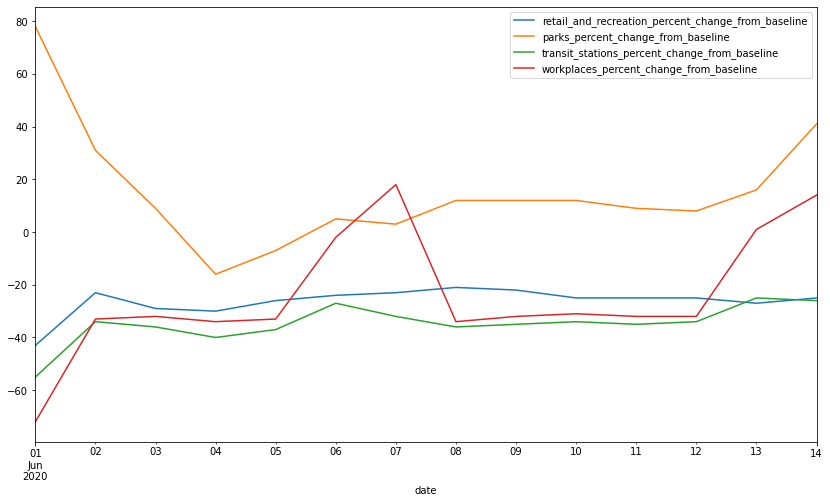

In [40]:
mobilite_df[cond][col_mobilite].loc[start_day:end_day].plot(kind='line')

<AxesSubplot:xlabel='Date'>

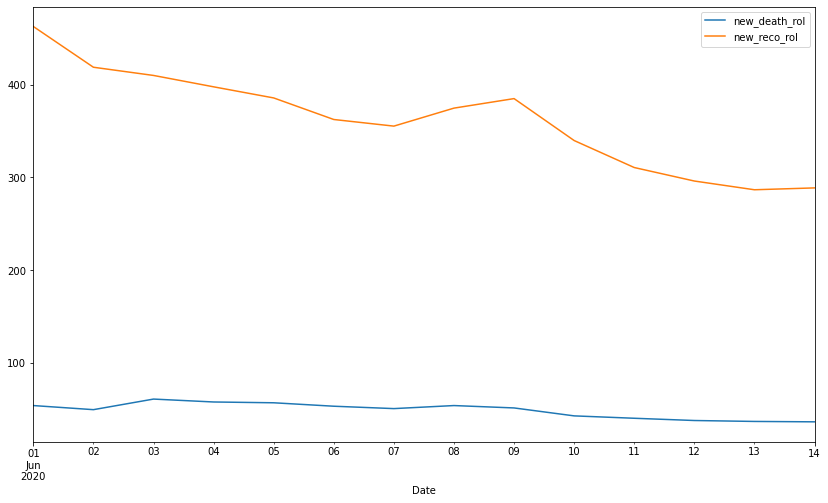

In [41]:
df[df["Country/Region"] == region][col_new_rol].loc[start_day:end_day].plot()

In [244]:
# import seaborn as sns

# ax = sns.lineplot(data = mobilite_df[cond][col_mobilite].loc[compute_start_date(day, window):day])

# Restrictions
   
- https://github.com/OxCGRT/covid-policy-tracker
- https://github.com/OxCGRT/covid-policy-tracker/blob/master/documentation/codebook.md

Sélectionner les indicateurs "Containment and closure policies" ?
https://github.com/OxCGRT/covid-policy-tracker/blob/master/documentation/codebook.md#containment-and-closure-policies

In [36]:
restrictions_df = pd.read_csv("OxCGRT_latest.csv", low_memory=False)

In [37]:
date_format_ox = "%Y%m%d"
restrictions_df['Date'] = pd.to_datetime(restrictions_df['Date'], format=date_format_ox)
restrictions_df.set_index("Date", inplace=True)

In [38]:
restrictions_df.head()

,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,...,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,Aruba,ABW,NaN,NaN,NAT_TOTAL,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-02,Aruba,ABW,NaN,NaN,NAT_TOTAL,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-03,Aruba,ABW,NaN,NaN,NAT_TOTAL,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-04,Aruba,ABW,NaN,NaN,NAT_TOTAL,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-05,Aruba,ABW,NaN,NaN,NAT_TOTAL,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [252]:
restrictions_df.CountryName.unique()

array(['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Australia', 'Austria',
       'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso',
       'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei', 'Bhutan', 'Botswana',
       'Central African Republic', 'Canada', 'Switzerland', 'Chile',
       'China', "Cote d'Ivoire", 'Cameroon',
       'Democratic Republic of Congo', 'Congo', 'Colombia', 'Comoros',
       'Cape Verde', 'Costa Rica', 'Cuba', 'Cyprus', 'Czech Republic',
       'Germany', 'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic',
       'Algeria', 'Ecuador', 'Egypt', 'Eritrea', 'Spain', 'Estonia',
       'Ethiopia', 'Finland', 'Fiji', 'France', 'Faeroe Islands', 'Gabon',
       'United Kingdom', 'Georgia', 'Ghana', 'Guinea', 'Gambia', 'Greece',
       'Greenland', 'Guatemala', 'Guam', 'Guyana', 'Hong Ko

In [256]:
restrictions_df[restrictions_df.CountryName == "France"].loc[compute_start_date(day, window):day]

,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,...,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay
Date,,,,,,,,,,,,,,,,,,,,,
2021-02-11,France,FRA,NaN,NaN,NAT_TOTAL,2.0,1.0,2.0,1.0,2.0,...,63.89,63.89,71.43,71.43,64.83,64.83,67.12,67.12,50.0,50.0
2021-02-12,France,FRA,NaN,NaN,NAT_TOTAL,2.0,1.0,2.0,1.0,2.0,...,63.89,63.89,71.43,71.43,64.83,64.83,67.12,67.12,50.0,50.0
2021-02-13,France,FRA,NaN,NaN,NAT_TOTAL,2.0,1.0,2.0,1.0,2.0,...,63.89,63.89,71.43,71.43,64.83,64.83,67.12,67.12,50.0,50.0
2021-02-14,France,FRA,NaN,NaN,NAT_TOTAL,2.0,1.0,2.0,1.0,2.0,...,63.89,63.89,71.43,71.43,64.83,64.83,67.12,67.12,50.0,50.0
2021-02-15,France,FRA,NaN,NaN,NAT_TOTAL,2.0,1.0,2.0,1.0,2.0,...,63.89,63.89,71.43,71.43,64.83,64.83,67.12,67.12,50.0,50.0
2021-02-16,France,FRA,NaN,NaN,NAT_TOTAL,2.0,1.0,2.0,1.0,2.0,...,63.89,63.89,71.43,71.43,64.83,64.83,67.12,67.12,50.0,50.0
2021-02-17,France,FRA,NaN,NaN,NAT_TOTAL,2.0,1.0,2.0,1.0,2.0,...,63.89,63.89,71.43,71.43,64.83,64.83,67.12,67.12,50.0,50.0
2021-02-18,France,FRA,NaN,NaN,NAT_TOTAL,2.0,1.0,2.0,1.0,2.0,...,63.89,63.89,71.43,71.43,64.83,64.83,67.12,67.12,50.0,50.0


In [40]:
restrictions_df[restrictions_df.CountryName == "France"].groupby("CountryName")

In [44]:
restrictions_df.dtypes

CountryName                               object
CountryCode                               object
RegionName                                object
RegionCode                                object
Jurisdiction                              object
C1_School closing                        float64
C1_Flag                                  float64
C2_Workplace closing                     float64
C2_Flag                                  float64
C3_Cancel public events                  float64
C3_Flag                                  float64
C4_Restrictions on gatherings            float64
C4_Flag                                  float64
C5_Close public transport                float64
C5_Flag                                  float64
C6_Stay at home requirements             float64
C6_Flag                                  float64
C7_Restrictions on internal movement     float64
C7_Flag                                  float64
C8_International travel controls         float64
E1_Income support   

DataError: No numeric types to aggregate

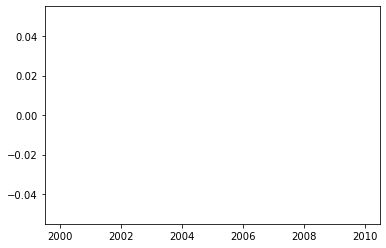

In [43]:
import seaborn as sns
sns.lineplot(data = restrictions_df[restrictions_df.CountryName == "France"])